In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

Getting Dataset, fashion MNIST Dataset

In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.2MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Visulize the data using plt

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

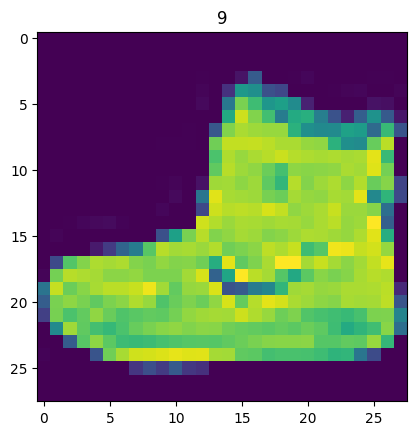

In [6]:
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze()) #removes the extra dimension
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

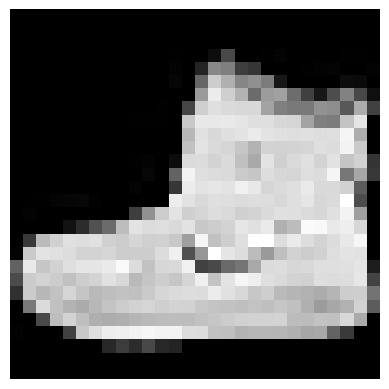

In [7]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.axis(False)

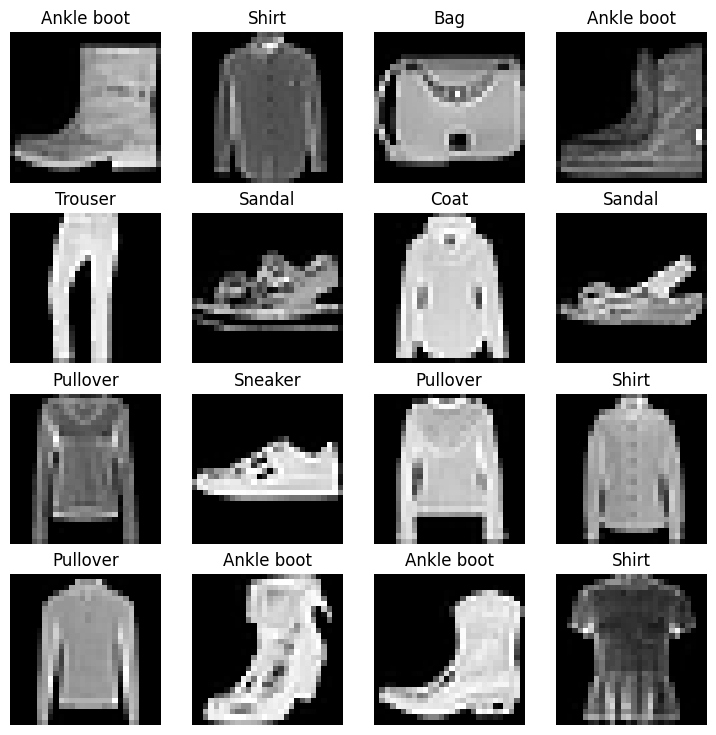

In [8]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, columns = 4, 4
for i in range(1, rows*columns+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

Prepare DataLoader

In [9]:
#turn data into batches/minibatches

In [10]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78d118a9b250>,
 <torch.utils.data.dataloader.DataLoader at 0x78d118ad7d50>)

In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [12]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

(torch.Size([1, 28, 28]), 6, 'Shirt')

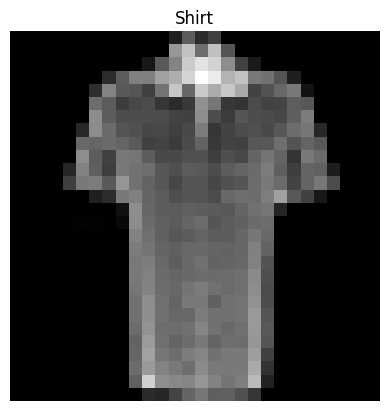

In [13]:
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
img.shape, label.item(), class_names[label.item()]


Baseline Model : model0

In [14]:
#Flatten layer
flatten_model = nn.Flatten()

#get single sample

x = train_features_batch[0]

output = flatten_model(x)
x.shape, output.shape #output is one big vector now, if squeeze on this
#even the extra dimension will collapse

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [15]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
     return self.layer_stack(x)

In [16]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

model0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

Setup loss, optimizer and evaluation metrics

In [18]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
from helper_functions import accuracy_fn

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

Creating a function to time our experiments

In [21]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

Creating training loop and training a model on BATCHES of data

In [22]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Move the model to the target device
model0.to(device)

for epoch in tqdm(range(epochs)):
  print(epoch)

  #Training
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()

    # Move data to the target device
    X, y = X.to(device), y.to(device)

    y_pred = model0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Move data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

train_time_end_on_cpu = timer()
total_train_time_model0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device = str(next(model0.parameters()).device)) # Modified to get the actual device

  0%|          | 0/3 [00:00<?, ?it/s]

0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 82.04%
1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.20%
2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.43%
Train time on cuda:0: 26.014 seconds


Make Predictions and get Model 0 results

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device=device):

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss+= loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc}

model_0_results = eval_model(model=model0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Setup Device Agnostic Code

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [25]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x)

In [26]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_shape = 784,
                             hidden_units = 10,
                             output_shape=len(class_names)).to(device)


In [27]:
next(model1.parameters()).device

device(type='cuda', index=0)

Loss, evaluation and optimization

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

Functionizing training & testing loops

In [29]:
def train_step(model: torch.nn.Module,
              dataloader,
              loss,
              optimizer,
              accuracy_fn,
              device=device):

  train_loss, train_acc = 0, 0
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.5f} Train acc: {train_acc:.2f}%\n")


In [30]:
def test_step(model: torch.nn.Module,
              dataloader,
              loss,
              accuracy_fn,
              device=device):

  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")



Using the training and testing functions

In [31]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model1,
             dataloader=train_dataloader,
             loss=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model1,
            dataloader=test_dataloader,
            loss=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 Train acc: 61.34%

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
---------
Train loss: 0.78101 Train acc: 71.93%

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
---------
Train loss: 0.67027 Train acc: 75.94%

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 27.833 seconds


In [32]:
#Get model1 results dictionary

model1_results = eval_model(model=model1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

 Model 2 : CNN

In [33]:
class FashionMNISTModelV2(nn.Module):
  """
  Model arch that replicates TinyVGG from CNN
  explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x


In [34]:
torch.manual_seed(42)
model2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=30,
                             output_shape=len(class_names)).to(device)
model2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [35]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(images.shape)
print(test_image.shape)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


In [36]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels = 10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [37]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_output = max_pool_layer(conv_output)
max_pool_output.shape

torch.Size([10, 31, 31])

In [38]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,2,2,2))
random_tensor
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(random_tensor.shape)
print(max_pool_tensor.shape)

torch.Size([1, 2, 2, 2])
torch.Size([1, 2, 1, 1])


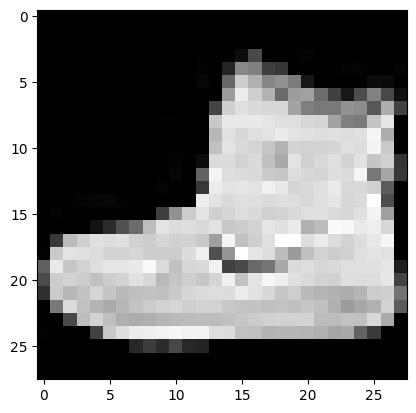

In [39]:
plt.imshow(image.squeeze(), cmap = 'gray')

Get loss and optimizer functions and eval functions ready


In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)


Training and Testing using our functions

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#measure time
from timeit import  default_timer as timer
train_time_start_model2 = timer()

epochs = 4
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model2,
             dataloader=train_dataloader,
             loss=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model2,
            dataloader=test_dataloader,
            loss=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model2 = timer()
total_train_time_model2 = print_train_time(start = train_time_start_model2,
                                           end = train_time_end_model2,
                                           device = device)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.73368 Train acc: 73.45%

Test loss: 0.37047 | Test acc: 86.77%

Epoch: 1
---------
Train loss: 0.32972 Train acc: 88.24%

Test loss: 0.31586 | Test acc: 88.68%

Epoch: 2
---------
Train loss: 0.28550 Train acc: 89.71%

Test loss: 0.29233 | Test acc: 89.42%

Epoch: 3
---------
Train loss: 0.25989 Train acc: 90.71%

Test loss: 0.28665 | Test acc: 89.61%

Train time on cuda: 45.624 seconds


In [42]:
model2_results = eval_model(model=model2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28665027022361755,
 'model_acc': 89.60662939297124}

Compare model results and training time

In [43]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model1_results, model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.286650,89.606629


Add training time to results comparison

In [44]:
compare_results["training_time"] = [total_train_time_model0,
                                    total_train_time_model1,
                                    total_train_time_model2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.013644
1,FashionMNISTModelV1,0.685001,75.019968,27.832906
2,FashionMNISTModelV2,0.286650,89.606629,45.623930


Visualize reults

Text(0, 0.5, 'model')

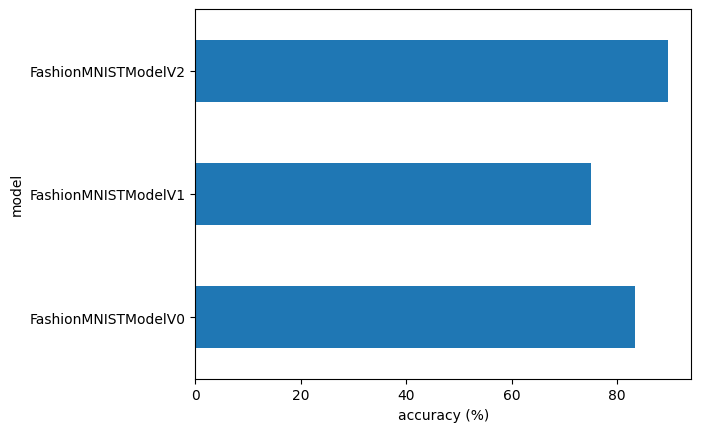

In [45]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [46]:
def make_preds(model, data : list, device : torch.device = device):
  pred = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
      pred.append(pred_prob.cpu())
  return torch.stack(pred)

In [47]:
import random
random.seed(82)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

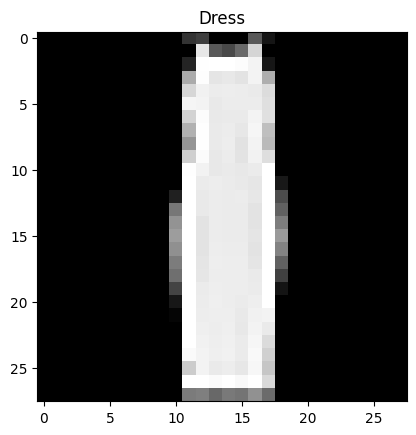

In [48]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

Make predictions

In [49]:
pred_probs = make_preds(model=model2,
                        data = test_samples)
pred_probs[:2]

tensor([[3.3628e-03, 2.0550e-03, 3.6606e-04, 9.8151e-01, 4.1938e-03, 1.4370e-04,
         1.5555e-03, 3.6033e-04, 7.7121e-04, 5.6786e-03],
        [4.0712e-04, 5.0417e-07, 4.4020e-05, 1.6626e-05, 4.4411e-06, 9.7750e-01,
         6.6252e-05, 8.0766e-03, 1.3842e-02, 4.5793e-05]])

Convert pred probs to labels

In [50]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 5, 4, 4, 2, 8, 9, 7, 2])

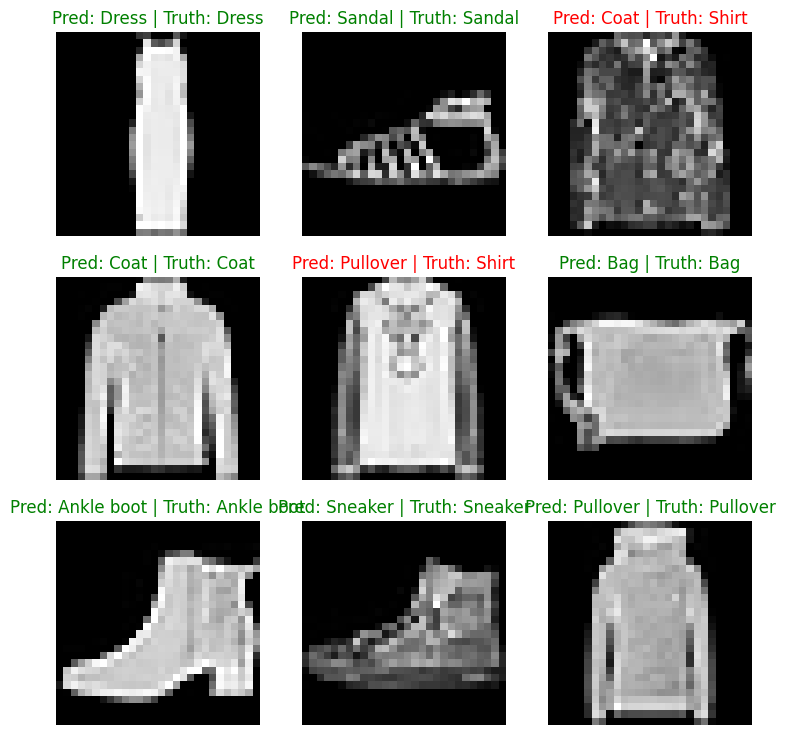

In [51]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  plt.imshow(sample.squeeze(), cmap = "gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, color = "green")
  else:
    plt.title(title_text, color = "red")
  plt.axis(False)

Making a Confusion Matrix

In [52]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [53]:
from tqdm.auto import tqdm

y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    y_logits = model2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

  #print(y_preds)
  y_preds_tensor = torch.cat(y_preds)
  print(y_preds_tensor)

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])


In [54]:
len(y_preds_tensor)

10000

In [55]:
!pip install -q torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.6 MB/s eta 0:00:00


In [56]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),
                          task = 'MULTICLASS')
confmat_tensor = confmat(y_preds_tensor, target= test_data.targets)
confmat_tensor

tensor([[778,   4,  26,  68,  12,   1, 107,   0,   3,   1],
        [ 19, 891,   0,  70,  10,   2,   7,   0,   1,   0],
        [ 25,   3, 743,  26, 103,   0,  96,   0,   4,   0],
        [ 25,   9,  12, 915,  15,   0,  21,   0,   2,   1],
        [ 10,   8,  74,  74, 726,   0, 105,   0,   2,   1],
        [ 29,   0,   4,  13,   0, 814,  11,  50,  62,  17],
        [127,   4,  68,  75,  88,   0, 630,   0,   8,   0],
        [  3,   0,   0,   0,   0,  27,   0, 923,   8,  39],
        [ 31,   3,   7,  27,   6,   8,  13,   5, 897,   3],
        [  4,   0,   0,   6,   0,  31,   3, 107,  25, 824]])

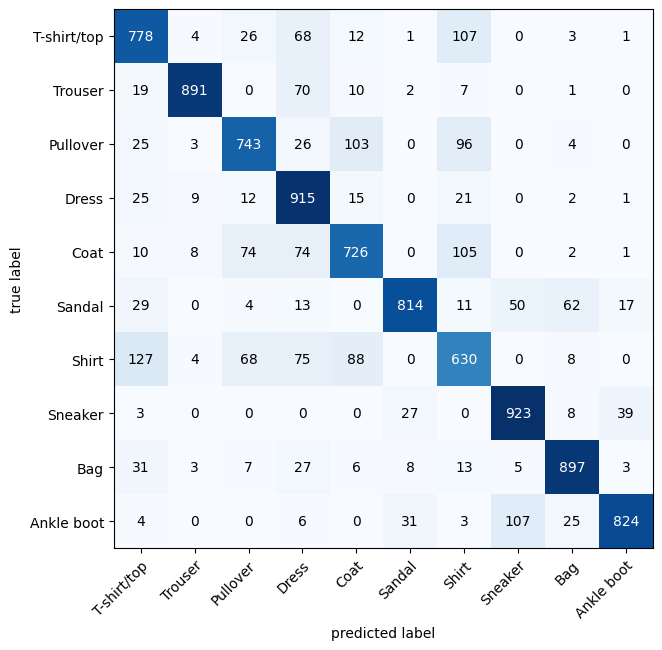

In [57]:
fig,ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               figsize=(10,7),
                               class_names=class_names)
plt.show()

Save and load best model

In [58]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "fashion_mnist_model2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model2.state_dict(),
           f=MODEL_SAVE_PATH)

In [59]:
torch.manual_seed(42)

loaded_model2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=30,
                                    output_shape = len(class_names))

loaded_model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [60]:
#evaluate the loaded model
model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28665027022361755,
 'model_acc': 89.60662939297124}

In [61]:
torch.manual_seed(42)

loaded_model2_results = eval_model(model =loaded_model2,
                                   data_loader = test_dataloader,
                                   loss_fn = loss_fn,
                                   accuracy_fn=accuracy_fn)

loaded_model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28665027022361755,
 'model_acc': 89.60662939297124}

In [62]:
torch.isclose(torch.tensor(model2_results["model_loss"]),
              torch.tensor(loaded_model2_results["model_loss"]))

tensor(True)